In [22]:
# sudo pip3 install sklearn --user
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#df = pd.read_csv("demo_dataset.csv")
df = pd.read_csv("datasets/aggreated_data.csv",low_memory=False)
df = df[df['accident_severity']>1]
df.shape


(281683, 70)

In [23]:
df=df.dropna() # The dataset is huge, therefore, dropping any rows with missing values is fine

In [24]:
df.shape

(171942, 70)

In [25]:
df1 = df[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail','junction_control','did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]
df1.shape

(171942, 11)

In [26]:
df2 = df[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions','age_of_vehicle','sex_of_driver','age_of_driver','junction_location', 'junction_detail','junction_control','did_police_officer_attend_scene_of_accident','accident_severity','day_of_week']]
df2.shape

(171942, 14)

In [27]:
df1.replace(-1, np.nan, inplace=True)
df1=df1.dropna() # I drop all the rows with missing data once again
df1.shape

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


(67595, 11)

In [28]:
df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()
df2.shape

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


(67506, 14)

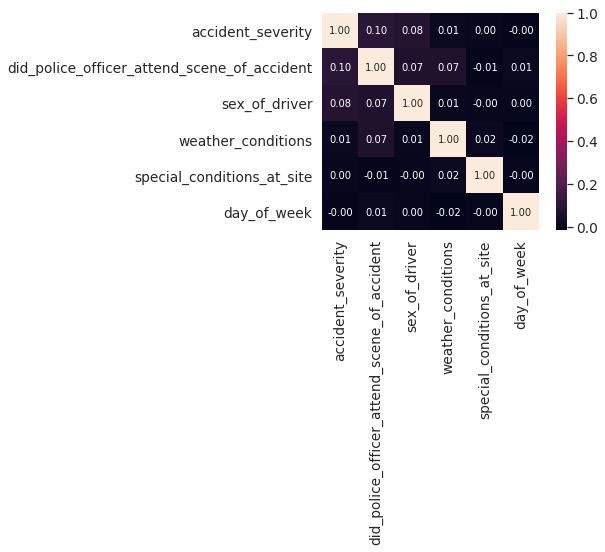

In [29]:
import matplotlib.pyplot as plt
corrmat = df2.corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'accident_severity')['accident_severity'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
df1= df1[:15000] #keep 1500 to decrease running times
df2= df2[:15000] #keep 15000

Y = df2.accident_severity.values
Y1 = df1.accident_severity.values
Y

array([3, 3, 3, ..., 3, 3, 3])

In [31]:
cols = df2.shape[1]
X = df2.loc[:, df2.columns != 'accident_severity']
X1 = df1.loc[:, df1.columns != 'accident_severity']
X.columns;

In [32]:
X.shape
X1.shape

(15000, 10)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=99)
#Without weather
svc = SVC()
svc.fit(X_train1, Y_train1)
Y_pred = svc.predict(X_test1)
acc_svc1 = round(svc.score(X_test1, Y_test1) * 100, 2)


In [34]:
acc_svc1

92.48

In [35]:
def plotRUC(yt, ys, title=None):
    '''
    绘制ROC-AUC曲线
    :param yt: y真值
    :param ys: y预测值
    '''
    from sklearn import metrics
    from matplotlib import pyplot as plt
    f_pos, t_pos, thresh = metrics.roc_curve(yt, ys)
    auc_area = metrics.auc(f_pos, t_pos)
    print('auc_area: {}'.format(auc_area))

    plt.plot(f_pos, t_pos, 'darkorange', lw=2, label='AUC = %.2f' % auc_area)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('ROC-AUC curve for %s' % title)
    plt.ylabel('True Pos Rate')
    plt.xlabel('False Pos Rate')
    plt.show()
    plt.savefig(os.path.join(CWD, 'middlewares/roc-' + title + '.png'))


In [36]:
plotRUC(Y_train1,Y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [10050, 4950]

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
class_names = df['accident_severity']
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test1, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[   1    1   22]
 [   1   54  314]
 [   0   45 4512]]


In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1, Y_pred)
cm

array([[   1,    1,   22],
       [   1,   54,  314],
       [   0,   45, 4512]])

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, Y_train1)
Y_pred = knn.predict(X_test1)
acc_knn1 = round(knn.score(X_test1, Y_test1) * 100, 2)
acc_knn1


90.55

In [36]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Y_pred = logreg.predict(X_test1)
acc_log1 = round(logreg.score(X_train1, Y_train1) * 100, 2)
acc_log1

92.47

In [41]:

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian1 = round(gaussian.score(X_test1, Y_test1) * 100, 2)
acc_gaussian1

42.69

In [42]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train1, Y_train1)
Y_pred = perceptron.predict(X_test1)
acc_perceptron1 = round(perceptron.score(X_test1, Y_test1) * 100, 2)
acc_perceptron1

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


91.96

In [43]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train1, Y_train1)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc1 = round(linear_svc.score(X_test1, Y_test1) * 100, 2)
acc_linear_svc1

92.06

In [44]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train1, Y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd1 = round(sgd.score(X_test1, Y_test1) * 100, 2)
acc_sgd1

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


92.06

In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree1 = round(decision_tree.score(X_test1, Y_test1) * 100, 2)
acc_decision_tree1

86.53

In [46]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train1)
acc_random_forest1 = round(random_forest.score(X_test1, Y_test1) * 100, 2)
acc_random_forest1

92.26